# Learning objectives:

- To understand what are imbalanced datasets and to choose correct evaluation metric for imbalanced data classification problems based on the business problem we are solving
- To learn about different data resampling techniques like under-sampling, oversampling and SMOTE to balance the target variable categories in imbalanced datasets
- To build predictive models and adjust probability thresholds using ROC curve to optimize the selected evaluation metric

### Business Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

This dataset is a bespoke dataset which contains transactions made by credit cards. This dataset contains transactions, where we have 180 frauds out of 4700 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 3.83% of all transactions. 

It contains only numerical input variables which are the result of a PCA transformation. The input features are transformed to maintain the confidentiality of the original features and more background information about the data. Features PC1, PC2, … PC5 are the principal components obtained with PCA, the only feature which have not been transformed with PCA is 'ID' and 'Class'. Feature 'Class' is the response variable and it takes **value 1 in case of fraud and 0 otherwise.**

Here is a vary famous dataset on [fraud detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) which is available on Kaggle and similar to this dataset

- Task 1: To understand the business problem that we are trying to solve and load the required libraries and the dataset into the jupyter notebook session.
- Task 2: To perform exploratory data analysis on the dataset to observe the patterns in the data, how they are related to each other and to visualize the data
- Task 3: To understand how to choose best evaluation metric for this business problem
- Task 4: To create a baseline model and where we will not handle the imbalanced property of the data and which we will use to compare with other advanced models that we will build in upcoming tasks
- Task 5: To create a classification model and where we will handle the imbalanced property of the data by using SMOTE data sampling technique
- Task 6: To learn and implement how to ROC AUC curve and its interpretation
- Task 7:  To learn and implement how to adjust probability threshold to increase recall of a model





### Task 1: Loading libraries and dataset

In [54]:
# import libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [55]:
# import dataset
data= pd.read_csv('/content/creditcard.csv')


### Task 2: Exploring and visualizing the dataset

In [56]:
# check the shape of dataset

data.shape

(4700, 7)

In [57]:
# check head of the dataset

data.head()

,ID,PC1,PC2,PC3,PC4,PC5,Class
0,0,-55.250726,-13.991887,28.487842,0.158826,-0.926407,0
1,1,-56.875735,-29.555189,1.990487,0.535853,0.452358,0
2,2,-59.144792,-52.266485,9.616903,0.522322,-1.009143,0
3,3,-50.205377,36.441617,14.527072,0.109211,0.593673,0
4,4,-55.707948,-18.275413,16.567411,-0.237213,1.206393,0


In [58]:
# check information about the dataset like - missing values, datatypes etc

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4700 non-null   int64  
 1   PC1     4700 non-null   float64
 2   PC2     4700 non-null   float64
 3   PC3     4700 non-null   float64
 4   PC4     4700 non-null   float64
 5   PC5     4700 non-null   float64
 6   Class   4700 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 257.2 KB


In [59]:
# check the target class distribution

data['Class'].value_counts()

0    4520
1     180
Name: Class, dtype: int64

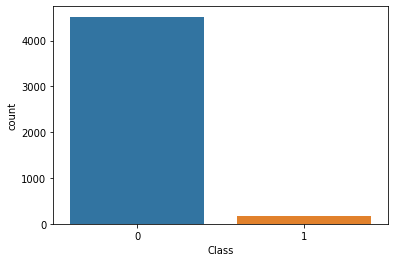

In [60]:
# create a visual plot to see the target distribution

sns.countplot(x='Class', data=data)

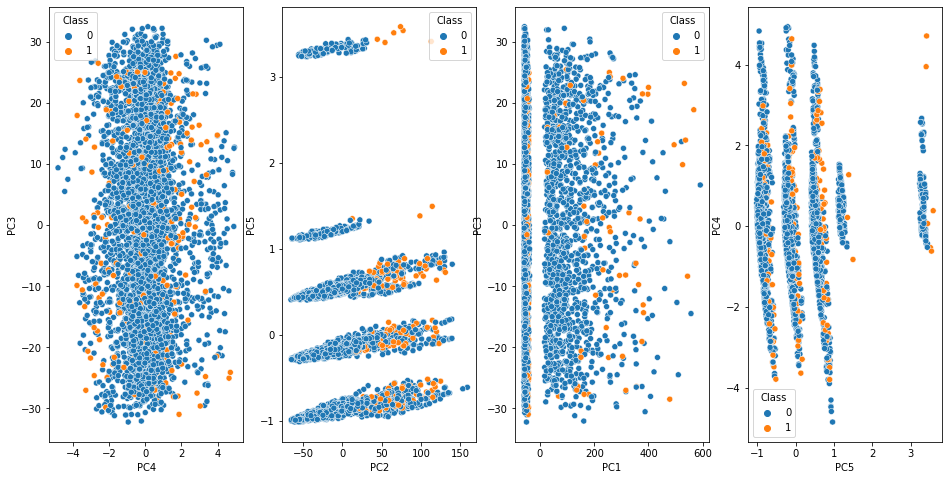

In [61]:
# create some scatterplots based on features and see if you can see some pattern in the data
fig, (ax1,ax2, ax3, ax4)=plt.subplots(1,4,figsize=(16,8))
sns.scatterplot(x='PC4', y='PC3', data=data, hue='Class', ax=ax1)
sns.scatterplot(x='PC2', y='PC5', data=data, hue='Class', ax=ax2)
sns.scatterplot(x='PC1', y='PC3', data=data, hue='Class', ax=ax3)
sns.scatterplot(x='PC5', y='PC4', data=data, hue='Class', ax=ax4)

### Task 3: Evaluation metric selection

In [62]:
# baseline accuracy of the model
# without even building a model , we can just assume all to be non fradulent and will still get an accuracy of 96%
#thus accuracy here is misleading
round(data['Class'].value_counts(normalize=True) * 100, 2)

0    96.17
1     3.83
Name: Class, dtype: float64

For this dataset let's consider fraudulent transactions (which are denoted as 1 in the dataset) is `positive` class and the non fraudulent transactions (which are denoted as 0 in the dataset) is `negative` class.

- TP - transactions which are actually fraudulent and the model also able correctly identify them as fraudulent transactions
- FP - transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- TN - transactions which are actually non fraudulent transactions and model is also predicting them as non fraudulent transactions
- FN - transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

**bold text**![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg "confusion matrix")

Out of the misclassifications - FN (False negative) and FP (False positive) which one is costlier for this business problem?

$$recall = \frac{TP}{TP + FN}$$

$$precision = \frac{TP }{TP+ FP}$$

- FN will cause business loss and we need to reduce the same
- building high recall model will then FN will reduce

Note to self: In case you ever get in a situation where you are confused with what to focus on : precision or recall( in case of a tradeoff ) , please go here: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

### Task 4: Baseline model
where we do not handle imbalance so that we can compare with balanced model

In [63]:
# drop the ID variable as it is unique for all the transactions and does not have any meaningful information about the data

data=data.drop(['ID'], axis=1)

In [64]:
# extract features and target from the original dataset

features=data.drop(['Class'], axis=1)
target=data['Class']

In [65]:
# split the dataset into trainig and test set to train and evaluate the model respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(features, target, test_size=0.3, random_state=42)


In [66]:
# create a random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
# predict for the test dataset

y_predict=rf.predict(X_test)

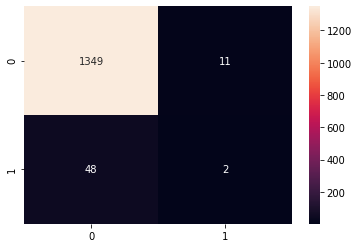

In [68]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='0.0f')


In [69]:
# print the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.15      0.04      0.06        50

    accuracy                           0.96      1410
   macro avg       0.56      0.52      0.52      1410
weighted avg       0.94      0.96      0.95      1410



### Task 5: Resampling techniques for imbalanced data

The imbalanced datasets are generally **biased towards the majority class** of the target variable. In this case the majority class is non fraudulent transactions and the minority class is fraudulent transactions. Hence if we don't balance these two classes the machine learning algorithms will be biased towards the majority class. Therefore it becomes important to balance the classes present in target variables. There are two ways in which we can balance these two categories - 

- **Undersampling**: In undersampling we randomly select as many observations of majority class as we have for minority class to make both of these classes balanced
- **Oversampling**: In oversampling, we create multiple copies of minority class to have same number of observations as we have for majority class. Here also we can oversampling in two ways - 
    - **Minority Oversampling**: here we create duplicates of same data from minority class
    - **SMOTE (Synthetic Minority Oversampling Technique)**: here we create observations for the minority class, based on those that already exist. It randomly picks a point from the minority class and computes the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![alt text](https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png "data resampling")

#### Synthetic Minority Oversampling Technique (SMOTE)

![alt text](https://qphs.fs.quoracdn.net/main-qimg-f6f5ede2e34dc466b6e754a0a7ee120a "SMOTE")

In [70]:
# import imblearn library and resample the original data using SMOTE technique
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_smote, y_smote=smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [71]:
# train a random forest model on SMOTE data
rf_smote=RandomForestClassifier(random_state=42)
rf_smote.fit(X_smote, y_smote)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

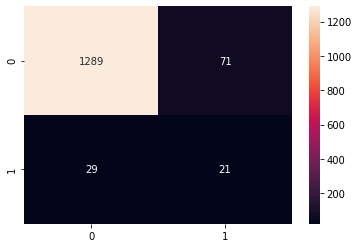

In [73]:
# predict the classes on test data using model built on SMOTE data and plot the confusion matrix

y_predict_smote=rf_smote.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_predict_smote), annot=True, fmt='0.0f')

In [75]:
# print the classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_smote))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1360
           1       0.23      0.42      0.30        50

    accuracy                           0.93      1410
   macro avg       0.60      0.68      0.63      1410
weighted avg       0.95      0.93      0.94      1410



### Task 6: Computing ROC AUC Curve

By defualt, every machine learning algorithm uses a probability threshold of 0.5 to classify between positive and negative classes. If we can tune this probability threshold to some other values which increases the true positive rate then we will be able to increase the recall for fraudulent transactions.

To do that we need to compute the AUC score. The AUC score signifies that the probability value of a random observation from the positive class (i.e. fraudulent transactions) is larger than the probability value of another random observation from the negative class (i.e. non fraudulent transactions). AUC value of 1 means all the predicted positive (fraudulent) transactions have higher probabilites of being fraudulent than the non fraudulent transactions, which is an ideal case. 

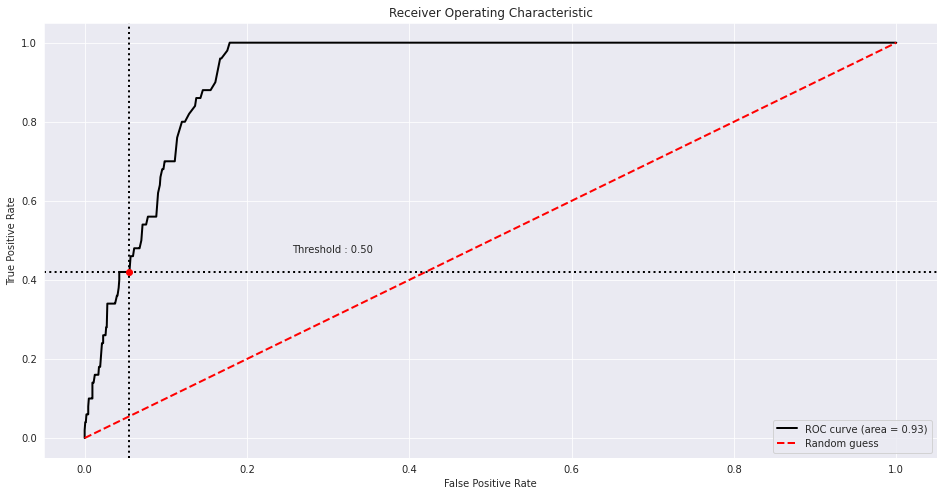

In [81]:
# let's compute the AUC curve for the model we developed on SMOTE data
!pip install plot_metric==0.0.6
from plot_metric.functions import BinaryClassification
bc=BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:,1], labels=[0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

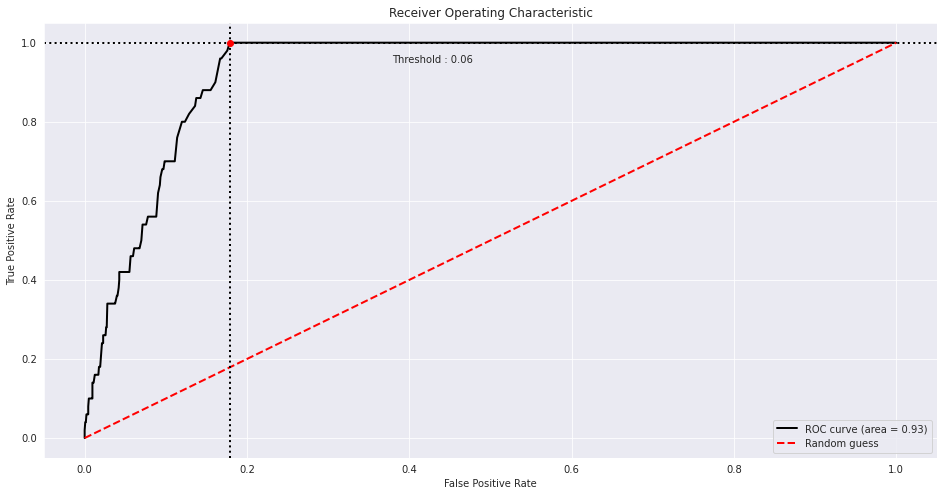

In [86]:
# let's use another probability threshold so that we can get to the elbow position in the above curve

bc=BinaryClassification(y_test, rf_smote.predict_proba(X_test)[:,1],threshold=0.06 ,labels=[0,1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

### Task 7: Adjusting probability threshold ( to 6% as derived from above)

In [91]:
# compute the probabilites of test observations using rf_smote model

y_predict_prob=rf_smote.predict_proba(X_test)[:,1]

In [95]:
# compare these probabilities against the probability threshold of 6% rather than the default threshold of 50%

y_predict_labels=(y_predict_prob>=0.06)

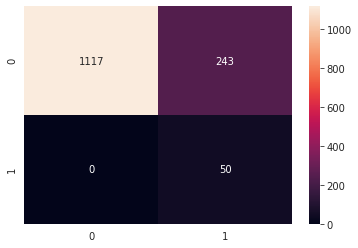

In [96]:
# plot the confusion matrix

sns.heatmap(confusion_matrix(y_test, y_predict_labels), annot=True, fmt='0.0f')

In [97]:
# print the classification report

print(classification_report(y_test, y_predict_labels))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90      1360
           1       0.17      1.00      0.29        50

    accuracy                           0.83      1410
   macro avg       0.59      0.91      0.60      1410
weighted avg       0.97      0.83      0.88      1410

